# STA365 Homework 4

### Question 1

#### Metropolis within Gibbs sampler

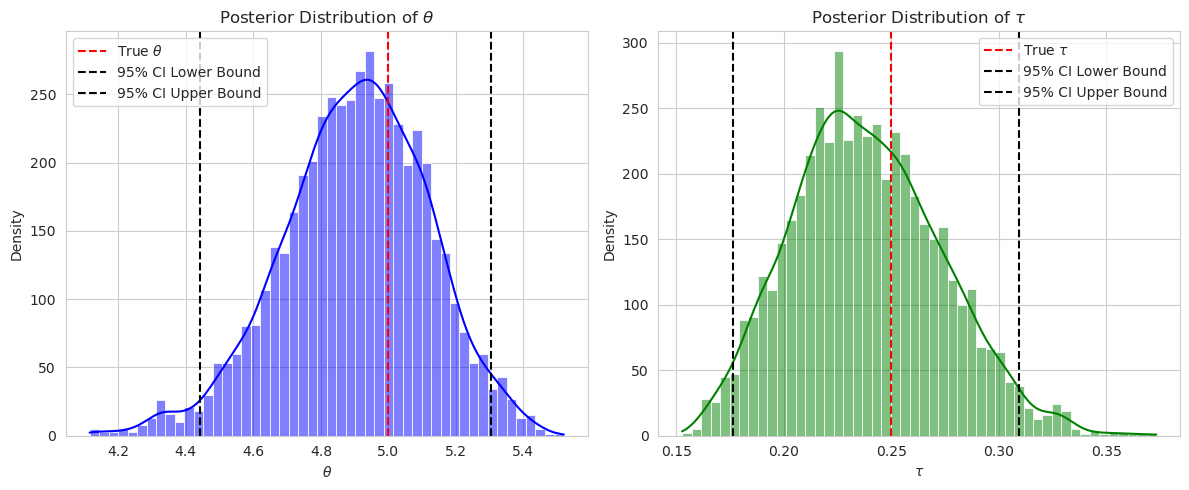

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1006264846)

# given prior parameters
theta_0 = 0  # prior mean for theta
tau_0 = 1    # prior precision for theta
alpha = 2    # shape parameter for Gamma prior
lambda_ = 2  # rate parameter for Gamma prior

# given data
n = 100  # 100 obs
true_theta = 5  # true theta
true_tau = 0.25  # True precision (1/variance)
x = stats.norm(loc=true_theta, scale=1/np.sqrt(true_tau)).rvs(size=n)

num_samples = 5000

theta_samples = np.zeros(num_samples)
tau_samples = np.zeros(num_samples)

# initial values
theta_samples[0] = np.mean(x)
tau_samples[0] = 1/np.var(x)

# Metropolis-Hastings within Gibbs Sampling
for i in range(1, num_samples):
    # update theta using MH
    current_theta = theta_samples[i-1]
    # propose a new theta (proposal distribution)
    proposed_theta = stats.norm(loc=current_theta, scale=0.1).rvs()
    
    # compute posterior for the current and proposed theta
    tau_n = tau_0 + n * tau_samples[i-1]
    mu_n = (tau_0 * theta_0 + n * tau_samples[i-1] * np.mean(x)) / tau_n
    current_theta_post = stats.norm.pdf(current_theta, loc=mu_n, scale=1/np.sqrt(tau_n))
    proposed_theta_post = stats.norm.pdf(proposed_theta, loc=mu_n, scale=1/np.sqrt(tau_n))
    
    # MH acceptance ratio
    acceptance_ratio_theta = proposed_theta_post / current_theta_post
    
    # accept or reject the proposed value of theta
    if np.random.rand() < acceptance_ratio_theta:
        theta_samples[i] = proposed_theta
    else:
        theta_samples[i] = current_theta
    
    # update tau using MH (using lognormal proposal instead of normal since always positive) - theta uses normal
    current_tau = tau_samples[i-1]
    # propose a new tau using lognormal distribution since always positive
    proposed_tau = np.exp(stats.norm(loc=np.log(current_tau), scale=0.1).rvs())
    
    # compute posterior for the current and proposed tau
    shape_n = (n + alpha) / 2
    rate_n = (np.sum((x - theta_samples[i])**2) + lambda_) / 2
    current_tau_post = stats.gamma.pdf(current_tau, a=shape_n, scale=1/rate_n)
    proposed_tau_post = stats.gamma.pdf(proposed_tau, a=shape_n, scale=1/rate_n)
    
    # MH acceptance ratio
    acceptance_ratio_tau = proposed_tau_post / current_tau_post
    
    # accept or reject the proposed value of tau
    if np.random.rand() < acceptance_ratio_tau:
        tau_samples[i] = proposed_tau
    else:
        tau_samples[i] = current_tau

# the samples in `theta_samples` and `tau_samples` now represent the posterior distributions.



sns.set_style("whitegrid")

# histogram for theta samples
plt.figure(figsize=(12, 5))

theta_ci = np.percentile(theta_samples, [2.5, 97.5])

plt.subplot(1, 2, 1)
sns.histplot(theta_samples, bins=50, kde=True, color="blue")
plt.axvline(true_theta, color='red', linestyle='--', label=r"True $\theta$")
plt.axvline(theta_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(theta_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\theta$")
plt.legend()

# histogram for tau samples
tau_ci = np.percentile(tau_samples, [2.5, 97.5])

plt.subplot(1, 2, 2)
sns.histplot(tau_samples, bins=50, kde=True, color="green")
plt.axvline(true_tau, color='red', linestyle='--', label=r"True $\tau$")
plt.axvline(tau_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(tau_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\tau$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\tau$")
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
"Fit results have mean = %.2f,  std = %.2f" % (m, s)

'Fit results have mean = 5.00,  std = 2.00'

In [5]:
# 95% credible interval for theta
theta_ci = np.percentile(theta_samples, [2.5, 97.5])

# 95% credible interval for tau
tau_ci = np.percentile(tau_samples, [2.5, 97.5])

print(f"95% Credible Interval for theta: ({theta_ci[0]:.3f}, {theta_ci[1]:.3f})")
print(f"95% Credible Interval for tau: ({tau_ci[0]:.3f}, {tau_ci[1]:.3f})")

95% Credible Interval for theta: (4.442, 5.304)
95% Credible Interval for tau: (0.176, 0.309)


#### Gibbs sampler from Hw3 Q2

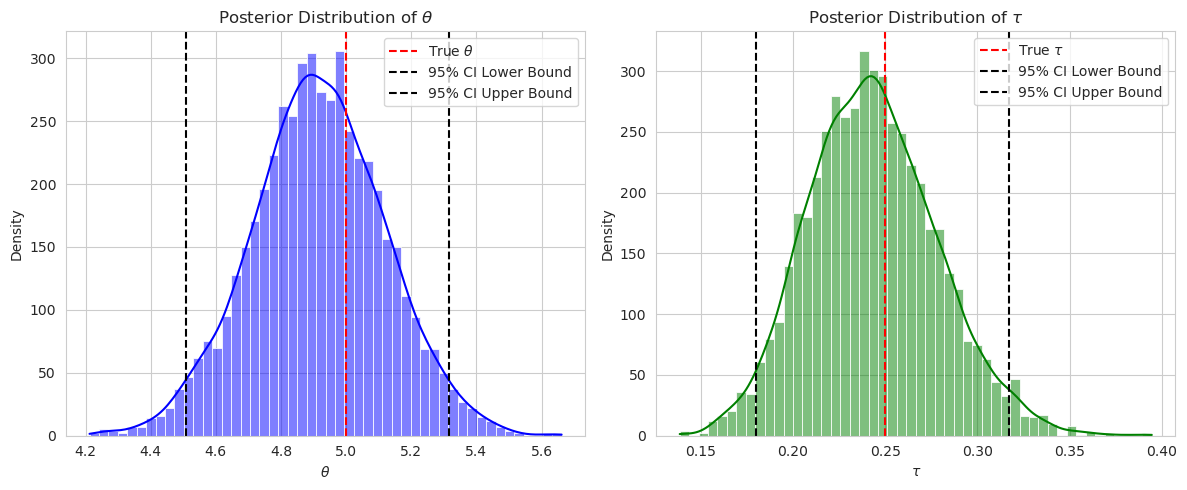

In [6]:
import numpy as np
import scipy.stats as stats

np.random.seed(1006264846)

# given prior parameters
theta_0 = 0  # prior mean for theta
tau_0 = 1    # prior precision for theta
alpha = 2    # shape parameter for Gamma prior
lambda_ = 2  # rate parameter for Gamma prior

# given data
n = 100  # 100 obs
true_theta = 5  # true theta
true_tau = 0.25  # True precision (1/variance)
x = stats.norm(loc=true_theta, scale=1/np.sqrt(true_tau)).rvs(size=n)

num_samples = 5000

theta_samples_hw3 = np.zeros(num_samples)
tau_samples_hw3 = np.zeros(num_samples)

# initial values
theta_samples_hw3[0] = np.mean(x)
tau_samples_hw3[0] = 1/np.var(x)

# Gibbs Sampling
for i in range(1, num_samples):
    # Sample theta | tau, x
    tau_n = tau_0 + n * tau_samples_hw3[i-1]
    mu_n = (tau_0 * theta_0 + n * tau_samples_hw3[i-1] * np.mean(x)) / tau_n
    theta_samples_hw3[i] = stats.norm(loc=mu_n, scale=1/np.sqrt(tau_n)).rvs()
    
    # Sample tau | theta, x
    shape_n = (n + alpha) / 2
    rate_n = (np.sum((x - theta_samples_hw3[i])**2) + lambda_) / 2
    tau_samples_hw3[i] = stats.gamma(a=shape_n, scale=1/rate_n).rvs()

# the samples in `theta_samples_hw3` and `tau_samples_hw3` now represent the posterior distributions.



import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# histogram for theta samples
plt.figure(figsize=(12, 5))

theta_ci = np.percentile(theta_samples_hw3, [2.5, 97.5])

plt.subplot(1, 2, 1)
sns.histplot(theta_samples_hw3, bins=50, kde=True, color="blue")
plt.axvline(true_theta, color='red', linestyle='--', label=r"True $\theta$")
plt.axvline(theta_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(theta_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\theta$")
plt.legend()



# histogram for tau samples

tau_ci = np.percentile(tau_samples_hw3, [2.5, 97.5])

plt.subplot(1, 2, 2)
sns.histplot(tau_samples_hw3, bins=50, kde=True, color="green")
plt.axvline(true_tau, color='red', linestyle='--', label=r"True $\tau$")
plt.axvline(tau_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(tau_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\tau$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\tau$")
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# 95% credible interval for theta
theta_ci_hw3 = np.percentile(theta_samples_hw3, [2.5, 97.5])

# 95% credible interval for tau
tau_ci_hw3 = np.percentile(tau_samples_hw3, [2.5, 97.5])

print(f"95% Credible Interval for theta: ({theta_ci_hw3[0]:.3f}, {theta_ci_hw3[1]:.3f})")
print(f"95% Credible Interval for tau: ({tau_ci_hw3[0]:.3f}, {tau_ci_hw3[1]:.3f})")

95% Credible Interval for theta: (4.508, 5.316)
95% Credible Interval for tau: (0.180, 0.317)


####  Comparing Gibbs sampler vs. Metropolis within Gibbs sampler

Gibbs sampler:
95% Credible Interval for theta: (4.442, 5.304),
95% Credible Interval for tau: (0.176, 0.309)

Metropolis within Gibbs sampler:
95% Credible Interval for theta: (4.508, 5.316),
95% Credible Interval for tau: (0.180, 0.317)

As seen above, both the Gibbs sampler and Metropolis within Gibbs sampler produce very similar results (basically the same result). This intuitively makes sense, as both methods are trying to approximate the same posterior distributions of Tau and Theta, they just use two different methods of sampling, but both these sampling methods converge on the same result.

### Question 2

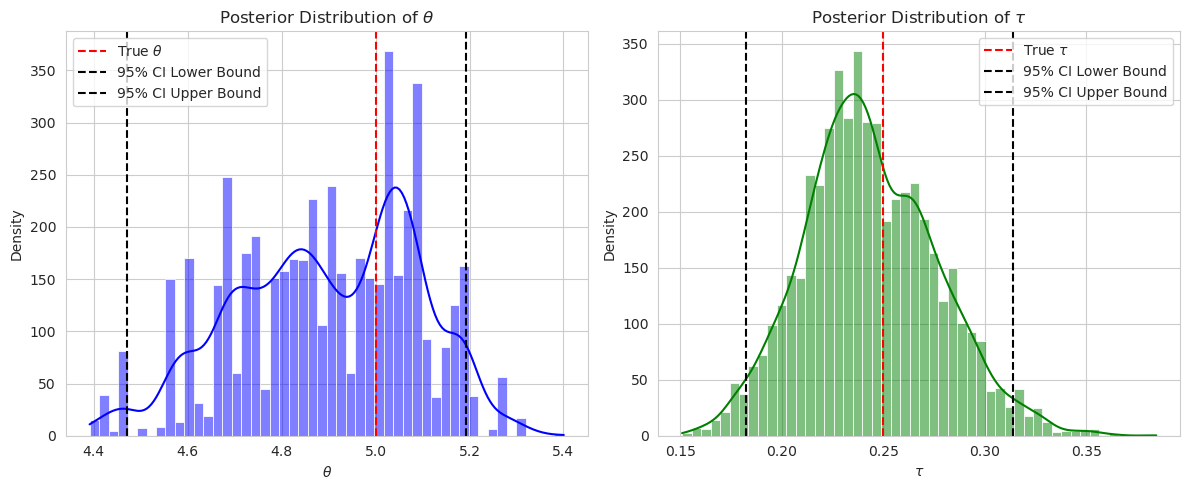

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1006264846)

# given prior parameters
theta_0 = 0  # prior mean for theta
tau_0 = 1    # prior precision for theta
alpha = 2    # shape parameter for Gamma prior for tau
lambda_ = 2  # rate parameter for Gamma prior for tau

# prior for theta: Using a Gamma prior for theta now, instead of Normal distr
theta_prior_shape = 2
theta_prior_rate = 1

# given data
n = 100  # 100 obs
true_theta = 5  # true theta
true_tau = 0.25  # True precision (1/variance)
x = stats.norm(loc=true_theta, scale=1/np.sqrt(true_tau)).rvs(size=n)

num_samples = 5000

theta_samples = np.zeros(num_samples)
tau_samples = np.zeros(num_samples)

# initial values
theta_samples[0] = np.mean(x)
tau_samples[0] = 1/np.var(x)

# Metropolis-Hastings within Gibbs Sampling
s = 0.1  # scale for proposal distr of tau

for i in range(1, num_samples):
    # update theta using MH (proposal: Gamma prior for theta)
    current_theta = theta_samples[i-1]
    # propose a new theta from a Gamma distribution
    proposed_theta = stats.gamma(a=theta_prior_shape, scale=1/theta_prior_rate).rvs()

    # compute the posterior for the current and proposed theta
    tau_n = tau_0 + n * tau_samples[i-1]
    mu_n = (tau_0 * theta_0 + n * tau_samples[i-1] * np.mean(x)) / tau_n
    current_theta_post = stats.norm.pdf(current_theta, loc=mu_n, scale=1/np.sqrt(tau_n))
    proposed_theta_post = stats.norm.pdf(proposed_theta, loc=mu_n, scale=1/np.sqrt(tau_n))

    # MH acceptance ratio for theta
    acceptance_ratio_theta = proposed_theta_post / current_theta_post
    
    # accept or reject the proposed value
    if np.random.rand() < acceptance_ratio_theta:
        theta_samples[i] = proposed_theta
    else:
        theta_samples[i] = current_theta
    
    # update tau using a truncated normal proposal (dependent on previous value of tau)
    current_tau = tau_samples[i-1]
    # proposal distribution for tau (truncated normal)
    lower_bound = -current_tau / s
    proposed_tau = stats.truncnorm.rvs(a=lower_bound, b=np.inf, loc=current_tau, scale=s)
    
    # compute the posterior for the current and proposed tau
    shape_n = (n + alpha) / 2
    rate_n = (np.sum((x - theta_samples[i])**2) + lambda_) / 2
    current_tau_post = stats.gamma.pdf(current_tau, a=shape_n, scale=1/rate_n)
    proposed_tau_post = stats.gamma.pdf(proposed_tau, a=shape_n, scale=1/rate_n)

    # MH acceptance ratio for tau
    acceptance_ratio_tau = proposed_tau_post / current_tau_post
    
    # accept or reject the proposed value
    if np.random.rand() < acceptance_ratio_tau:
        tau_samples[i] = proposed_tau
    else:
        tau_samples[i] = current_tau

# the samples in `theta_samples` and `tau_samples` now represent the posterior distributions.



sns.set_style("whitegrid")

# histogram for theta samples
plt.figure(figsize=(12, 5))

theta_ci = np.percentile(theta_samples, [2.5, 97.5])

plt.subplot(1, 2, 1)
sns.histplot(theta_samples, bins=50, kde=True, color="blue")
plt.axvline(true_theta, color='red', linestyle='--', label=r"True $\theta$")
plt.axvline(theta_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(theta_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\theta$")
plt.legend()

# histogram for tau samples
tau_ci = np.percentile(tau_samples, [2.5, 97.5])

plt.subplot(1, 2, 2)
sns.histplot(tau_samples, bins=50, kde=True, color="green")
plt.axvline(true_tau, color='red', linestyle='--', label=r"True $\tau$")
plt.axvline(tau_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(tau_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\tau$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\tau$")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# 95% credible interval for theta
theta_ci = np.percentile(theta_samples, [2.5, 97.5])

# 95% credible interval for tau
tau_ci = np.percentile(tau_samples, [2.5, 97.5])

print(f"95% Credible Interval for theta: ({theta_ci[0]:.3f}, {theta_ci[1]:.3f})")
print(f"95% Credible Interval for tau: ({tau_ci[0]:.3f}, {tau_ci[1]:.3f})")

95% Credible Interval for theta: (4.471, 5.192)
95% Credible Interval for tau: (0.182, 0.314)


#### Summary of results so far:

Gibbs sampler:
95% Credible Interval for theta: (4.442, 5.304),
95% Credible Interval for tau: (0.176, 0.309)

Metropolis within Gibbs sampler:
95% Credible Interval for theta: (4.508, 5.316),
95% Credible Interval for tau: (0.180, 0.317)

Updated Metropolis within Gibbs sampler for Q2:
95% Credible Interval for theta: (4.471, 5.192),
95% Credible Interval for tau: (0.182, 0.314)


As seen above, all three samplers produce very similar results. This is because all three samplers are still converging to the same posterior distributions of Tau and Theta. Even though I used a Gamma prior for Theta in my most recent sampler (compared to Normal for the first two samplers), the priors did not have enough weight to completely change the posterior distribution and therefore get drowned out by the likelihoods as we collect more and more data points.

#### Necessity (or lackthereof) of analytically determining the full conditional distributions when performing Gibbs sampling:

While it is convenient and usually necessary to have the full conditional distributions when using Gibbs sampling (as the Gibbs sampling method relies on drawing observations from all the full conditional distributions), the results we've seen above imply that we can instead use the Metropolis within Gibbs method when the full conditional distributions are not available, and still end up with the same posterior results. Therefore, the full conditional distributions are nice to have (because then you can just use Gibbs sampler without MH, which can save some computation time), but are not mandatory.

### Question 3

Since $q(0∣1)=q(1∣0)=1/2$ and $q(0∣0)=q(1∣1)=1/2$, the proposal is symmeteric, and the correction factor within the MH acceptance probability simplifies to 1.

Therefore, the MH acceptance probability is simplifies to $P_a(x,\tilde{x}) = min(1,\frac{p(\tilde{x})}{p(x)})$.

For the stationary distribution given, we have that $p(0)=1/3$ and $p(1)=2/3$.

Therefore, 
- $P(x^{(t)}=0 \to x^{(t+1)}=0) = q(0|0) + q(1|0) (1-P_a(0,1)) = \frac{1}{2} + \frac{1}{2}(1-1) = 0.5$
- $P(x^{(t)}=0 \to x^{(t+1)}=1) = q(1|0) P_a(0,1) = \frac{1}{2} \cdot 1 = 0.5$
- $P(x^{(t)}=1 \to x^{(t+1)}=0) = q(0|1) P_a(1,0) = \frac{1}{2} \cdot \frac{1}{2} = 0.25$
- $P(x^{(t)}=1 \to x^{(t+1)}=1) = q(1|1) + q(0|1) (1-P_a(1,0)) = \frac{1}{2} + \frac{1}{2}(1-1/2) = 0.75$

Therefore, 
- $P(x^{(t)}=0 \to x^{(t+1)}=0) = q(0|0) + q(1|0) (1-P_a(0,1)) = \frac{1}{2} + \frac{1}{2}(1-min(1,\frac{2/3}{1/3})) = 0.5$
- $P(x^{(t)}=0 \to x^{(t+1)}=1) = q(1|0) P_a(0,1) = \frac{1}{2} \cdot min(1,\frac{2/3}{1/3}) = \frac{1}{2} \cdot 1 = 0.5$
- $P(x^{(t)}=1 \to x^{(t+1)}=0) = q(0|1) P_a(1,0) = \frac{1}{2} \cdot min(1,\frac{1/3}{2/3}) = \frac{1}{2} \cdot \frac{1}{2} = 0.25$
- $P(x^{(t)}=1 \to x^{(t+1)}=1) = q(1|1) + q(0|1) (1-P_a(1,0)) = \frac{1}{2} + \frac{1}{2} (1-min(\frac{1/3}{2/3})) = \frac{1}{2} + \frac{1}{2}(1-1/2) = 0.75$

as required.